In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from tqdm import trange
import pandas as pd
inputs =pd.read_table('data_lab2/cities.dat',header=None,sep=',',)
inputs =np.array(inputs.to_numpy(),dtype=float)

In [27]:
class SOM:
    def __init__(self,inputs,num_nodes):
        self.inputs=inputs
        self.num_nodes=num_nodes
        self.W = np.random.rand(num_nodes,inputs.shape[1])

    def GetClosetOne(self,x):
        dist =(x-self.W)
        return np.argmin(np.sum(np.multiply(dist,dist),axis=1))

    def UpdateWeights(self,x,Np,radius,lr):
        l = int(Np-radius+self.num_nodes)%self.num_nodes
        r = int(Np+radius)%self.num_nodes
        while l!=r:
            self.W[l]+=lr*(x-self.W[l])
            l=(l+1)%self.num_nodes


    def train(self,epochs=20,lr=0.2,C=2):
        X = self.inputs
        for epoch in trange(epochs):
            radius =np.round(C*(1-epoch/epochs))
            for i,x in enumerate(X):
                Np = self.GetClosetOne(x)
                self.UpdateWeights(x,Np,radius,lr)
    def use(self,X):
        result = np.zeros(X.shape[0])
        for i,x in enumerate(X):                
            Np = self.GetClosetOne(x)
            result[i]=Np
        return result

100%|██████████| 20/20 [00:00<00:00, 911.49it/s]


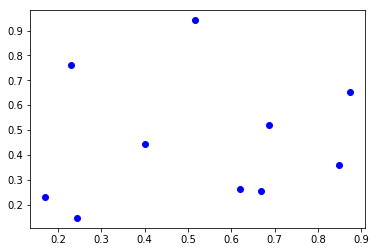

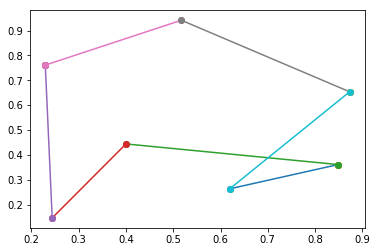

In [70]:
test = SOM(inputs,10)
test.train()
result = test.use(inputs)
#print(result)

plt.plot(inputs[:,0],inputs[:,1],'bo')
plt.show()
for i in range(len(result)):
    nextone=int(result[(i+1)%len(result)])
    cur = int(result[i])
    plt.plot((inputs[cur][0],inputs[nextone][0]),(inputs[cur][1],inputs[nextone][1]),'-o') 
plt.show()

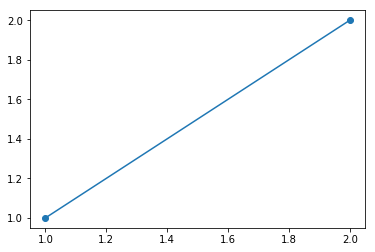

In [60]:
plt.plot((1,2),(1,2),'-o')
plt.show()